# IMPORTS





In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score


#  LOAD DATA

In [51]:
df = pd.read_csv("Wholesale customers data.csv")

# CHECK DATA

In [52]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [53]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [54]:
df.shape

(440, 8)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [56]:
df.isna().sum().sum()

np.int64(0)

In [57]:
df.duplicated().sum()

np.int64(0)

# EDA

In [58]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [59]:
num_columns=df.select_dtypes(exclude='object').columns
num_columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

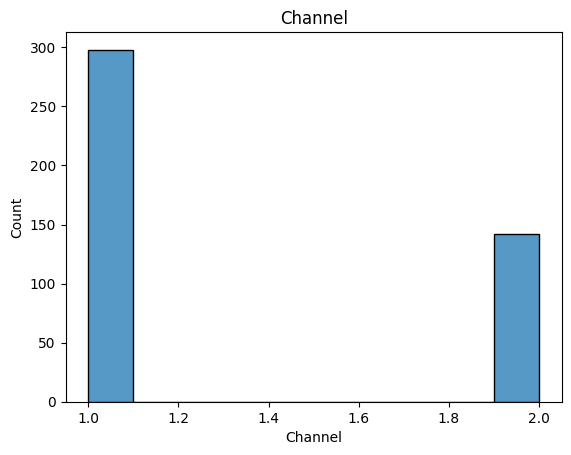

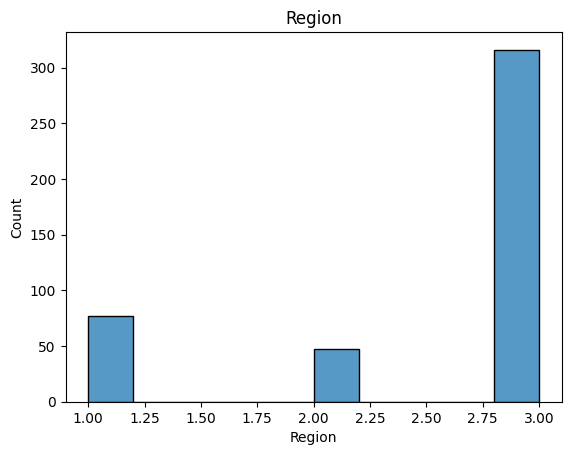

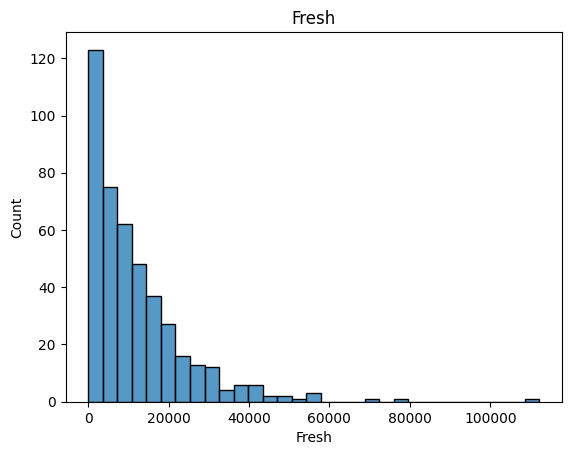

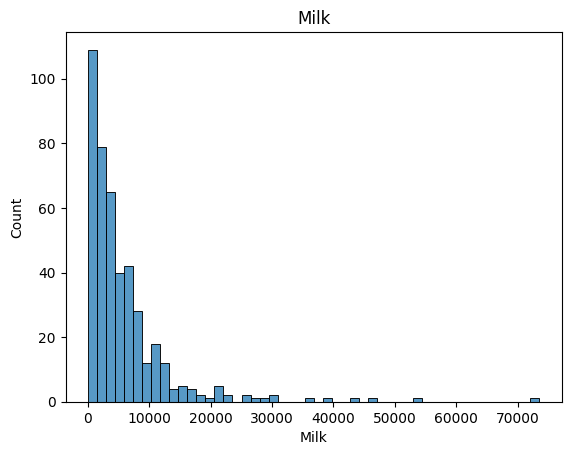

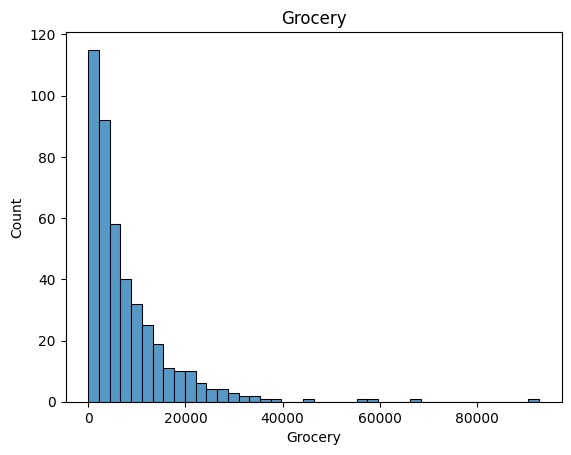

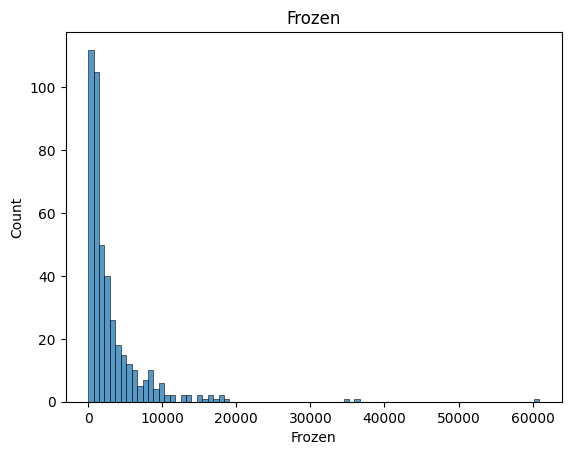

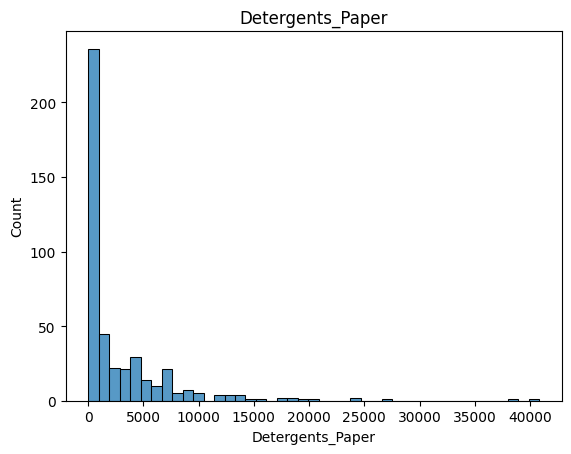

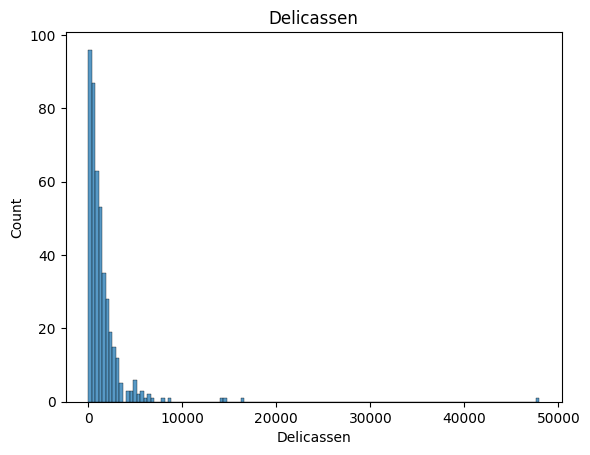

In [60]:
#histogram for num_columns

for i in num_columns:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()

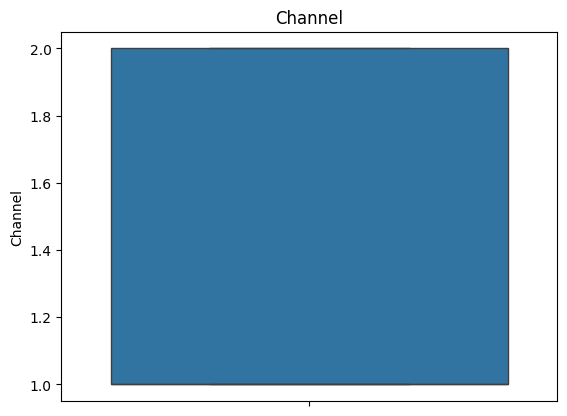

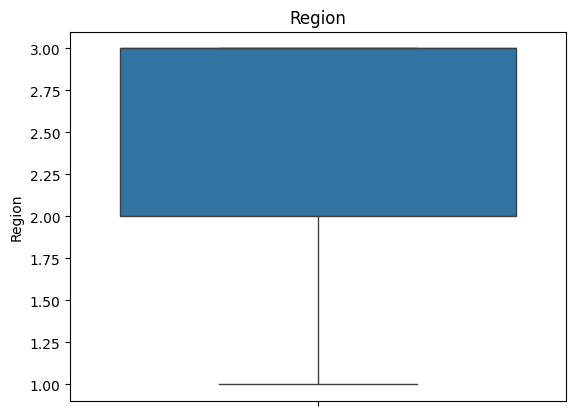

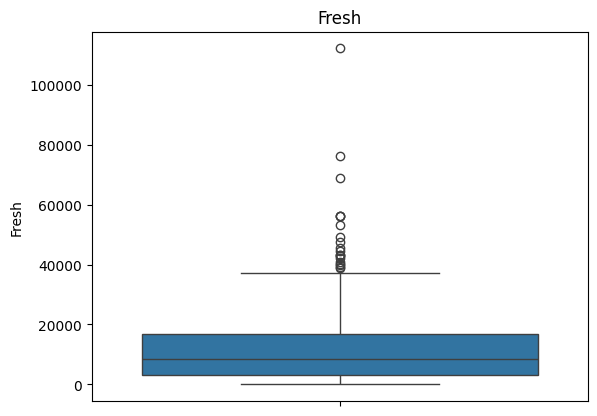

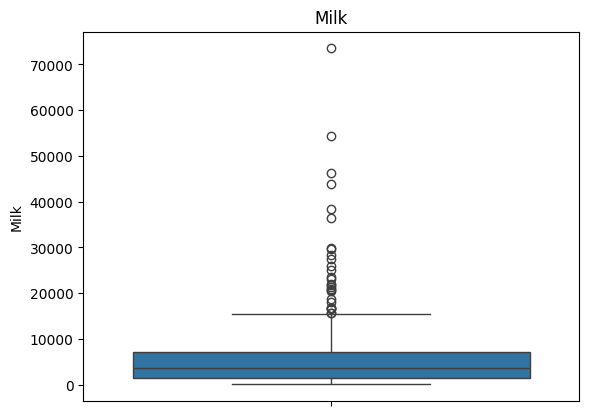

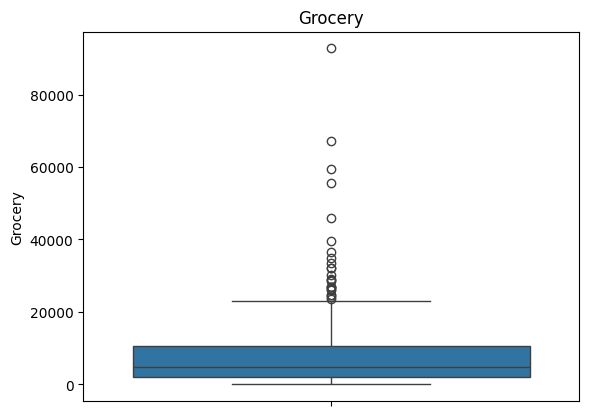

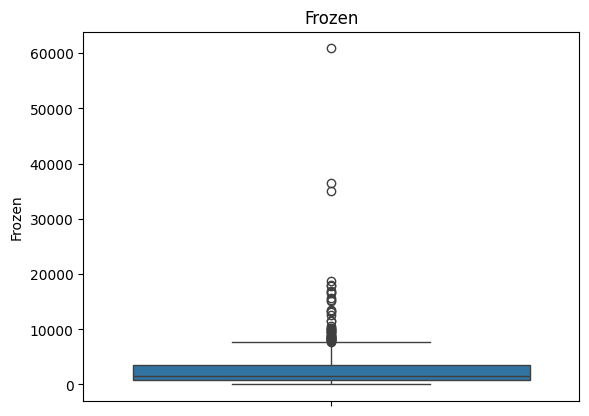

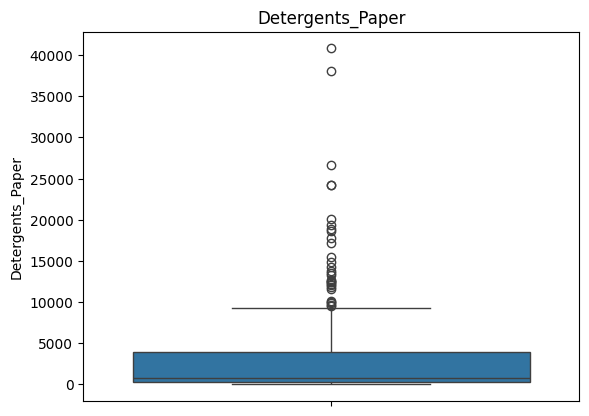

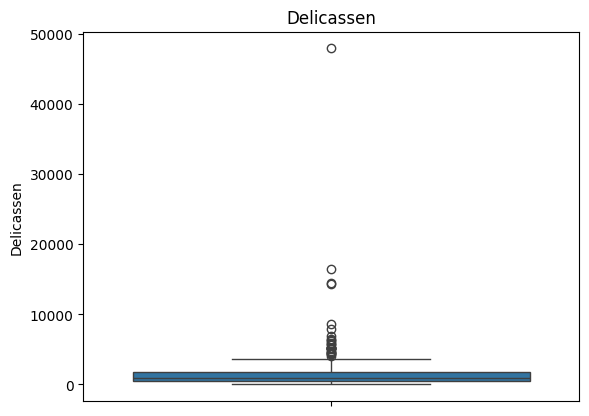

In [61]:
#boxplot for num columns
for i in num_columns:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

<Axes: >

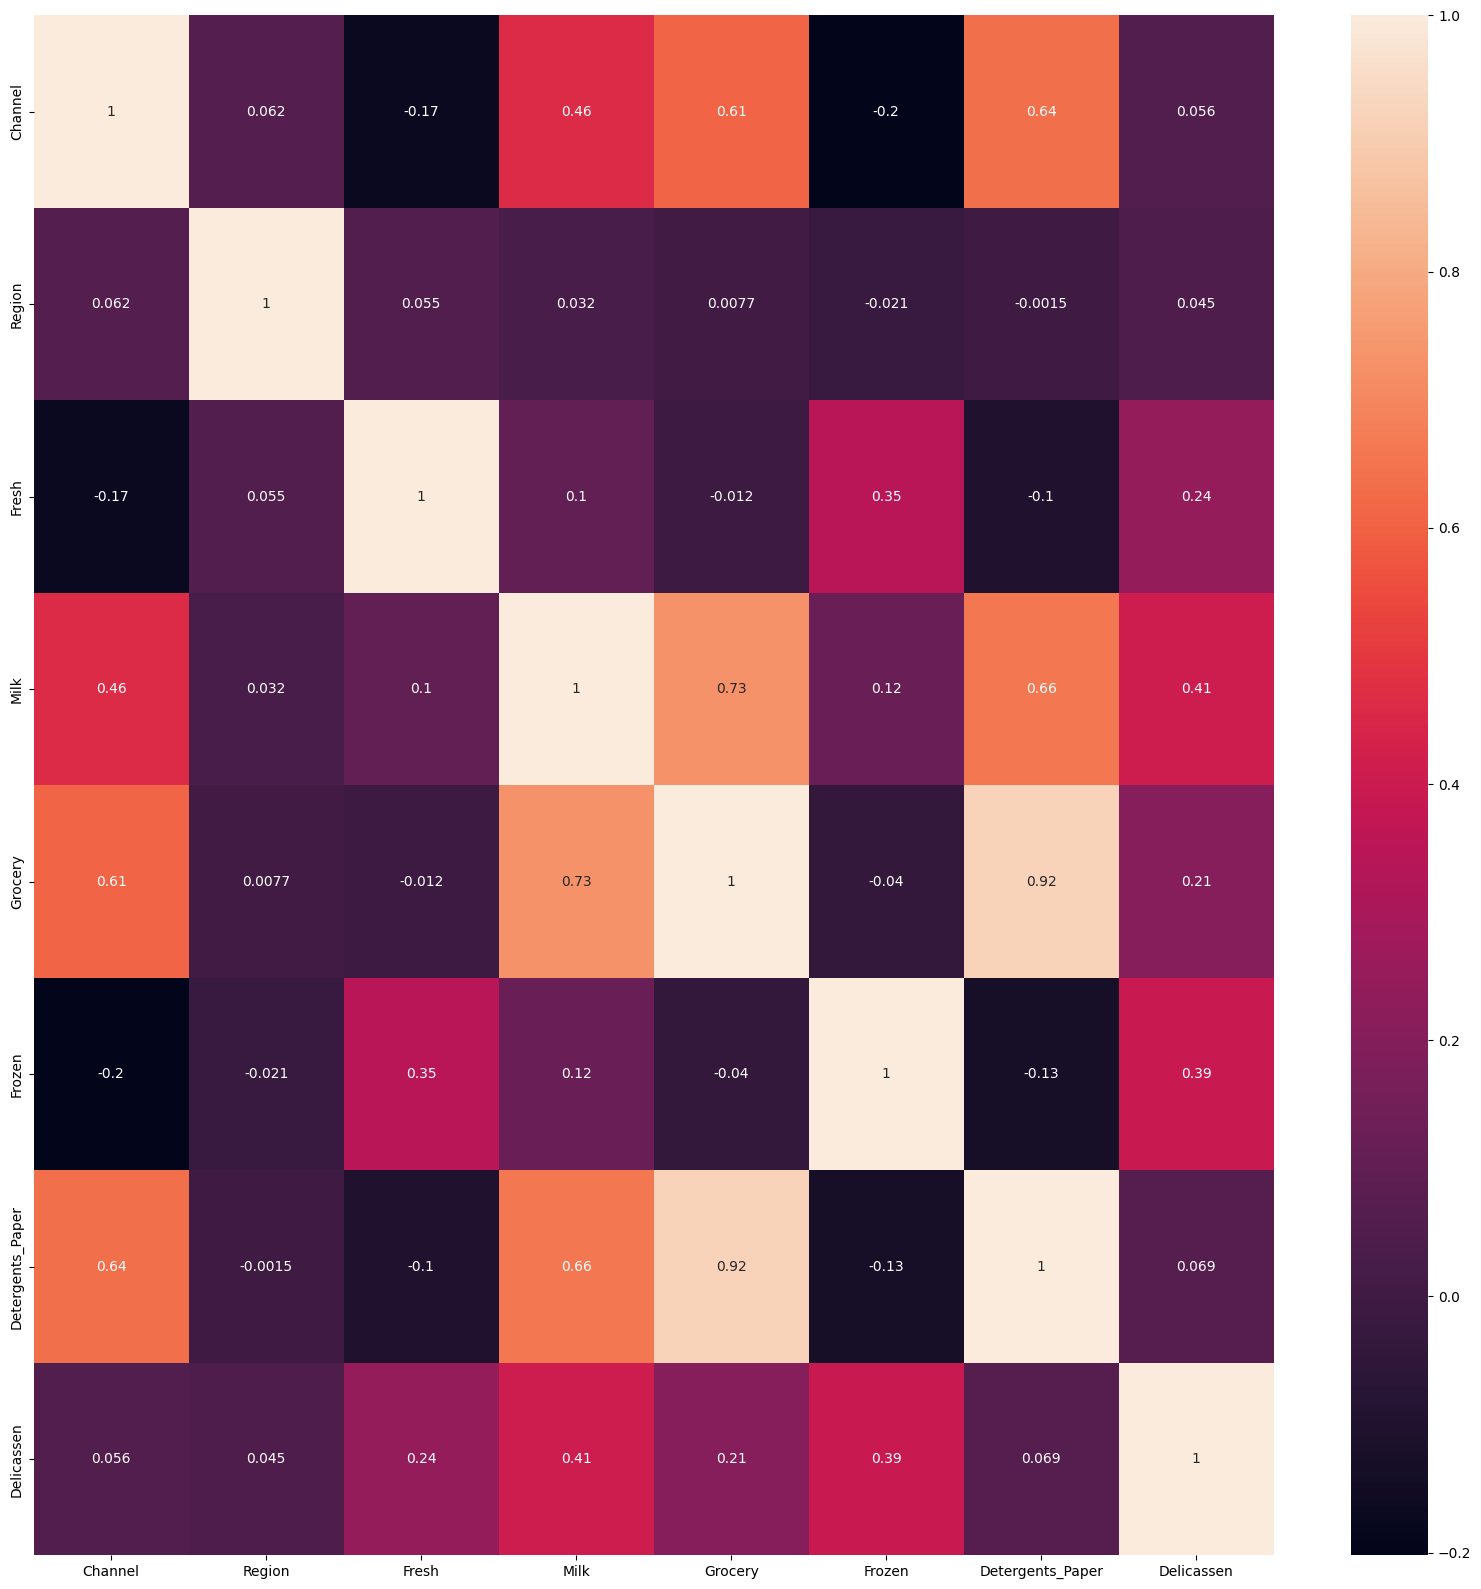

In [62]:
#heatmap for num columns
plt.figure(figsize=(20,20))
sns.heatmap(df[num_columns].corr(),annot=True)

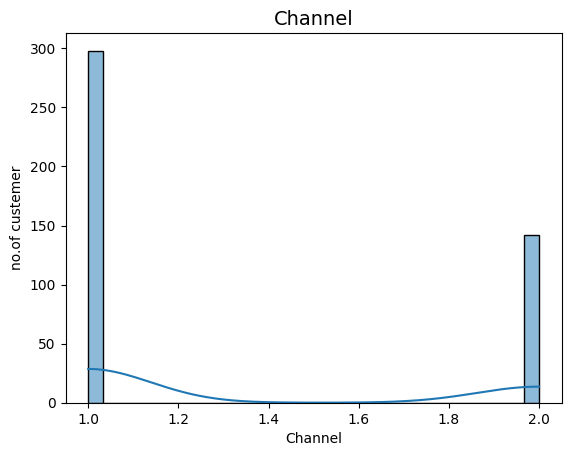

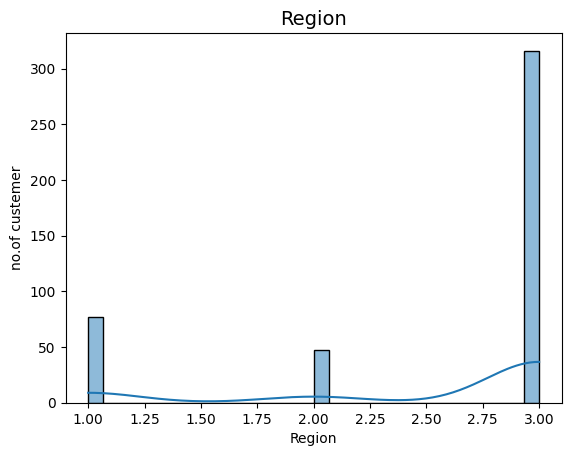

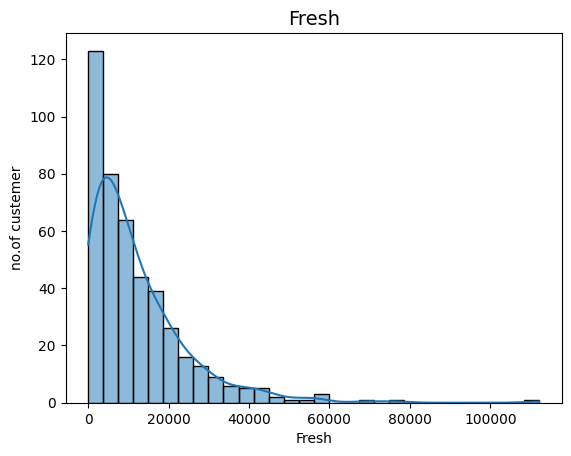

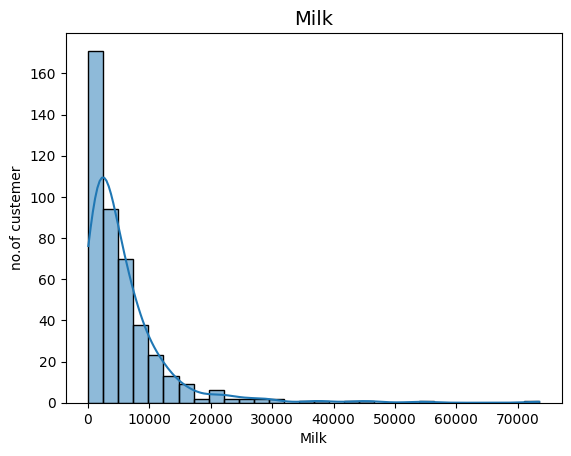

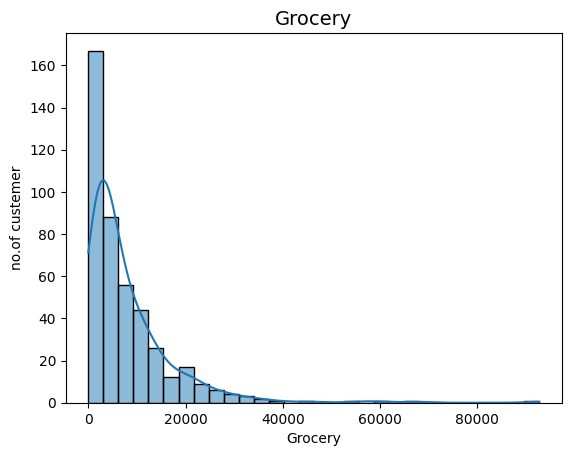

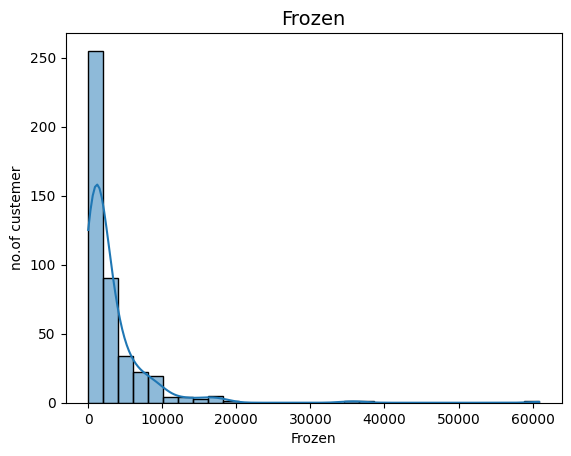

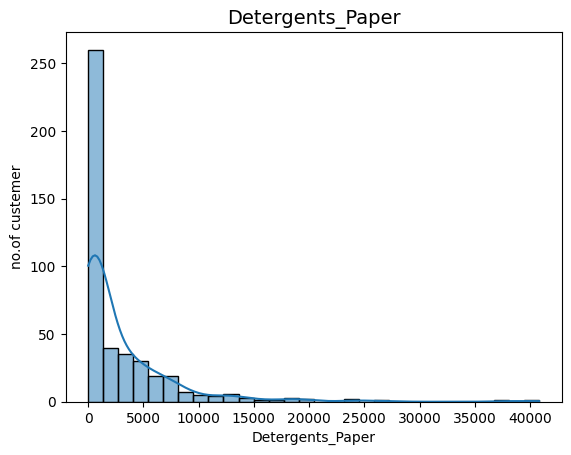

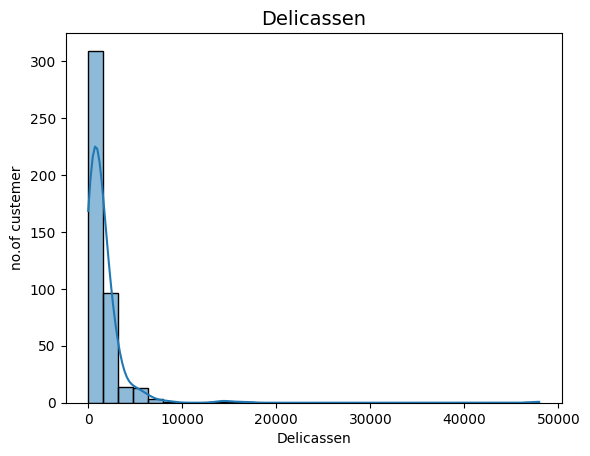

In [63]:
for col in df.columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("no.of custemer")
    plt.show()

In [64]:
# Select numerical features (excluding Channel and Region)
X = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]


In [65]:
X_log = np.log1p(X)   # log(1+x)


In [66]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_log)


In [67]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

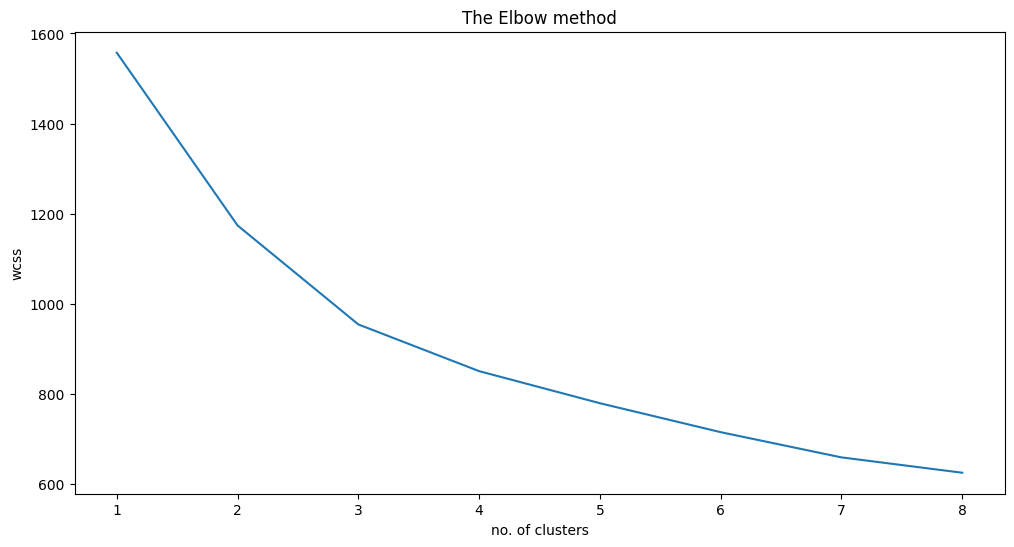

In [68]:
plt.figure(figsize=(12,6))
plt.plot(range(1,9), wcss)
plt.title("The Elbow method")
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # غيري n_clusters حسب الـ elbow
kmeans.fit(X_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [70]:
df['Cluster'] = kmeans.labels_

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        2  
4        5185        2  


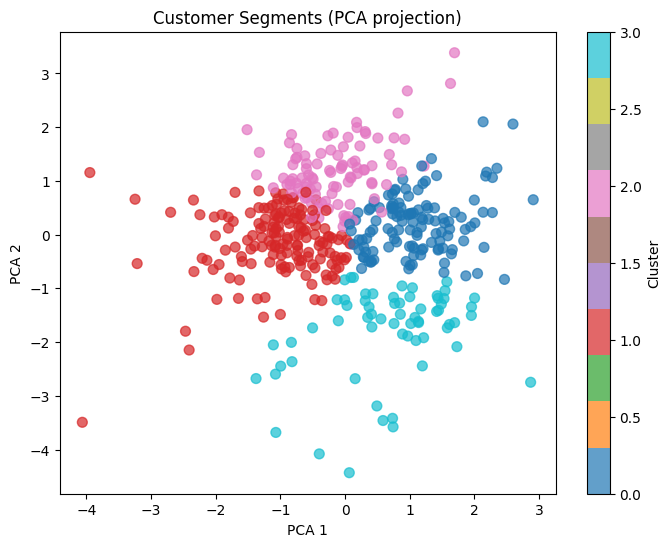

In [71]:
from sklearn.decomposition import PCA

# ----- 6) Reduce to 2D with PCA -----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

# ----- 7) Scatter Plot -----
plt.figure(figsize=(8,6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='tab10', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments (PCA projection)')
plt.colorbar(label='Cluster')
plt.show()


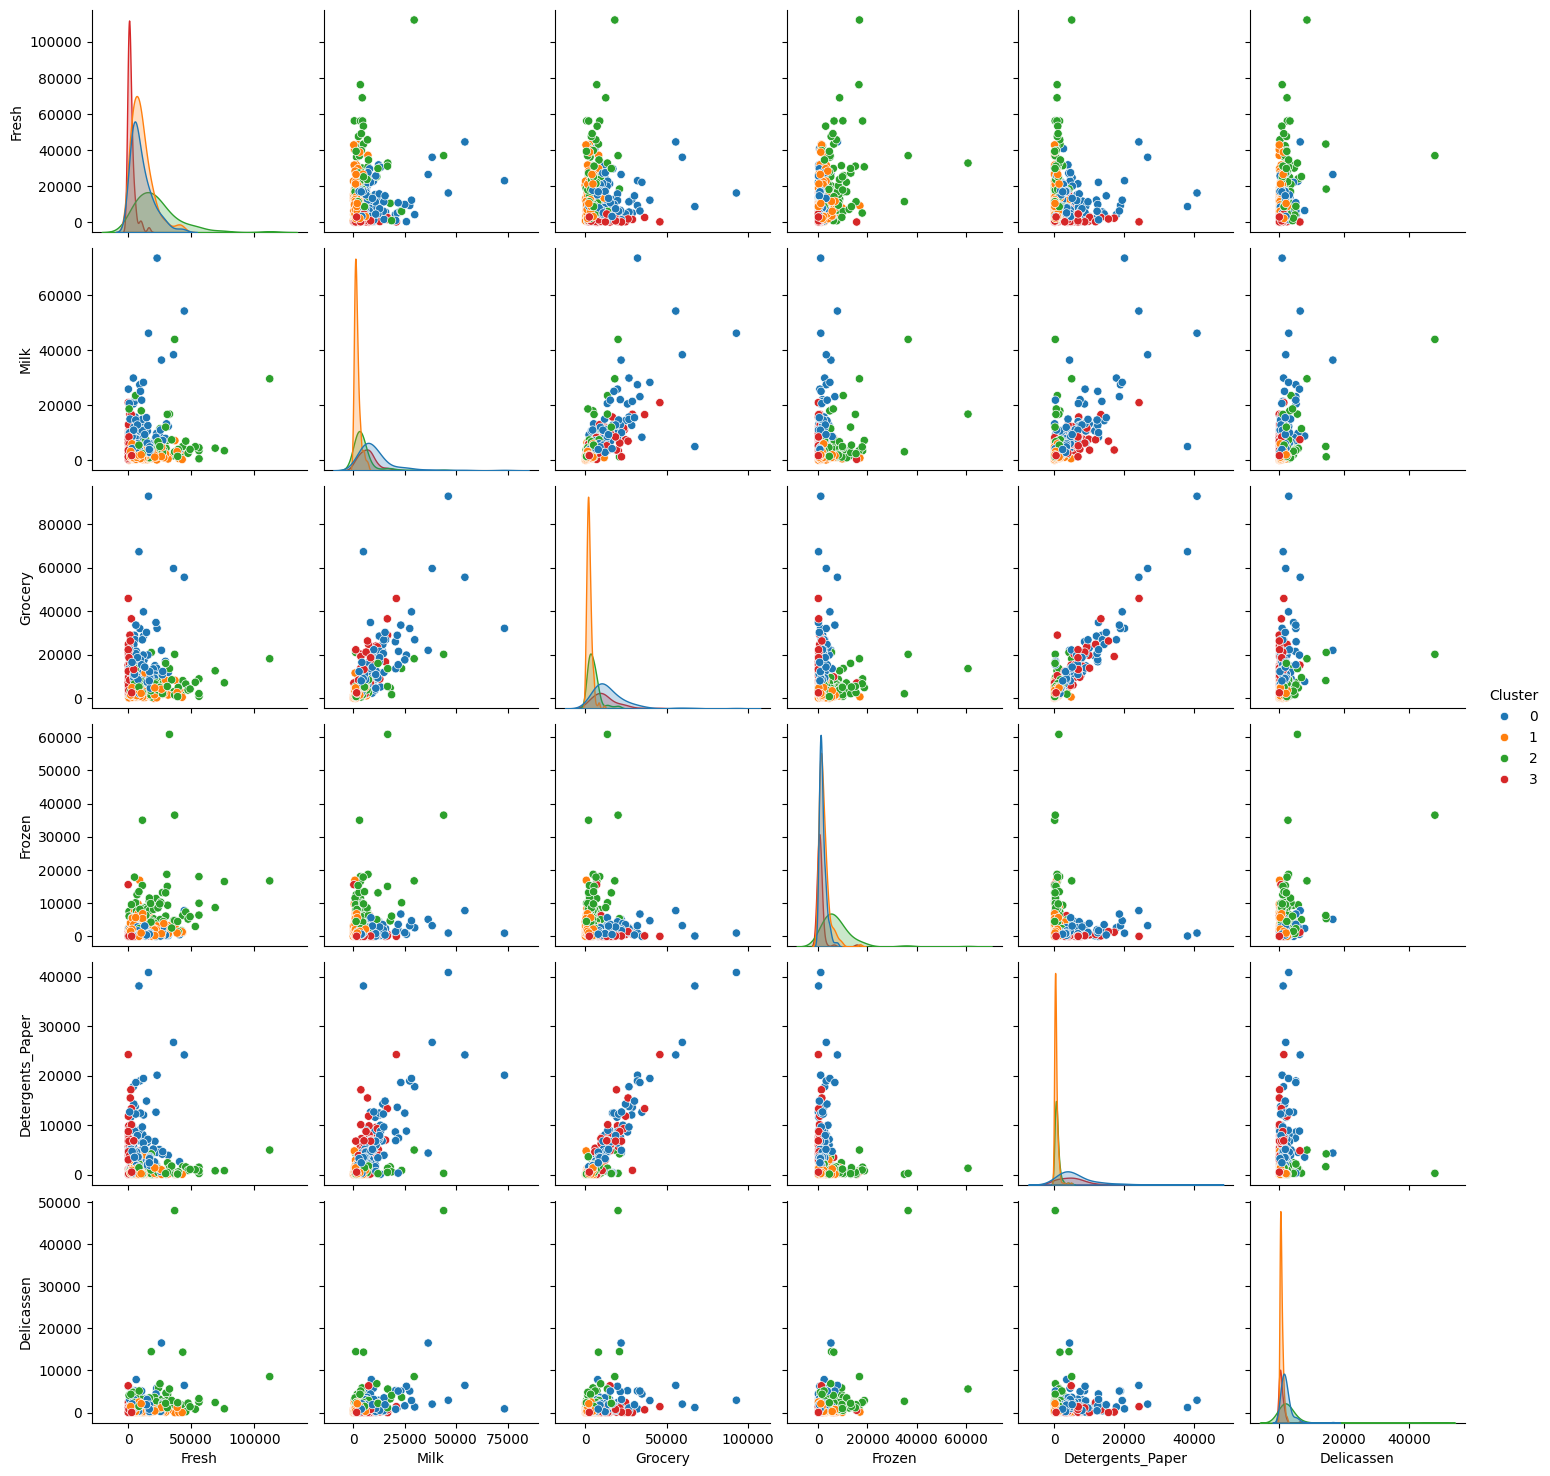

In [72]:
import seaborn as sns

sns.pairplot(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Cluster']], 
             hue='Cluster', 
             palette='tab10')
plt.show()


📊 Cluster Summary (Average values):
                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0        10553.549180  11099.081967  15286.352459  1666.622951   
1        10801.594937   1814.246835   2336.658228  2178.816456   
2        22466.770833   4964.177083   5054.927083  7844.760417   
3         2017.750000   6766.515625  12174.406250   796.437500   

         Detergents_Paper   Delicassen  
Cluster                                 
0             6498.811475  2074.803279  
1              449.000000   616.689873  
2              770.906250  2916.020833  
3             5157.078125   631.906250  


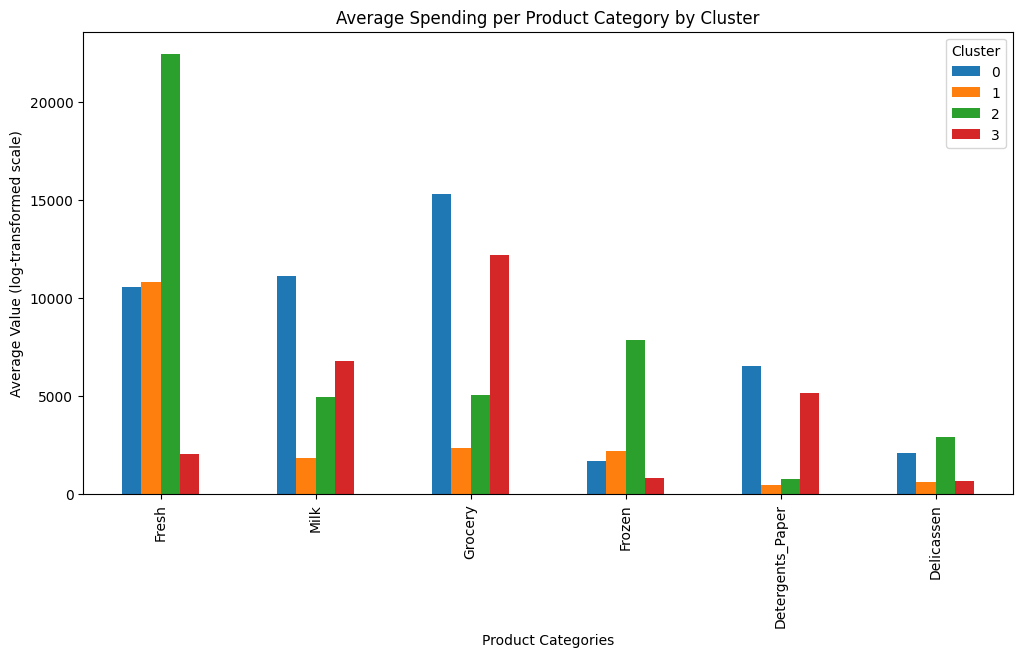

In [74]:
# ----- 1) Cluster Summary Table -----
cluster_summary = df.groupby('Cluster')[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].mean()

print("📊 Cluster Summary (Average values):")
print(cluster_summary)

# ----- 2) Bar Plot for Cluster Profiles -----
import matplotlib.pyplot as plt

cluster_summary.T.plot(kind='bar', figsize=(12,6))
plt.title('Average Spending per Product Category by Cluster')
plt.ylabel('Average Value (log-transformed scale)')
plt.xlabel('Product Categories')
plt.legend(title='Cluster')
plt.show()


In [75]:
cluster_description = {
    0: "Supermarket-like (High Milk, Grocery, Detergents)",
    1: "Fresh Lovers (High Fresh, low other categories)",
    2: "HoReCa - Hotels/Restaurants (High Fresh + Frozen)",
    3: "Processed Food Buyers (Milk + Grocery + Detergents)"
}

for c, desc in cluster_description.items():
    print(f"Cluster {c}: {desc}")


Cluster 0: Supermarket-like (High Milk, Grocery, Detergents)
Cluster 1: Fresh Lovers (High Fresh, low other categories)
Cluster 2: HoReCa - Hotels/Restaurants (High Fresh + Frozen)
Cluster 3: Processed Food Buyers (Milk + Grocery + Detergents)


In [77]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)


with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("kmeans.pkl", "rb") as f:
    kmeans = pickle.load(f)
